

<center> <h1> Evolution of emotions conveyed by media and their link with the society state </h1> 
<h2> Project Milestone 2 </h2> </center>

<h2> Data collection </h2> 

<u> Source location related data : </u>

When we started processing the data located on the cluster (*'/datasets/gdeltv2'*), we encountered a serious issue : very surprisingly, the dataset does not contain any record related to the media source location. However, we planned in Milestone 1 to focus our project on the specificity of the medias related to their home country.
Thus we spent a lot of time on trying to find ways to circumvent this issue and get information about the source location by other means.
<br>
<ol>
    <li>First, we looked at URL extensions. Indeed, some countries have specific URL extentions (‘.fr’, ‘.it’, etc), and we can use this criterion to filter event mentions.
However, this solution is clearly not very representative because most of the sources (METTRE QUERY QUI PROUVE CE FAIT) have a ‘.com’ extension, and this in not informative. Moreover, countries like the USA only use ‘.com’ extensions. </li> <br>
    
<li>Then, we chose a different strategy : we searched for rankings (EST-CE QU’ON PEUT TROUVER DES RANKINGS PLUS FIABLES?) to get the main online medias in a small sample of countries (France, USA). Then we stored these lists of sources and we filtered the event mentions dataset to get medias related to these sources. If we base these queries on relevant information (selection of the principal medias), this strategy can be a good option. However, it requires a lot of manual work, and we had many issues related to the string filter used. Indeed, if fetching only the sources whose name is strictly <i>‘foxnews.com’</i> for example, one would miss <i>'foxcarolina.com'</i> and all the other state-specific or city-specific related webpages. But if we set a very open regular expression like ‘%fox%' or '%wsj%' (for the Wall Street Journal), we get a lot of false negatives like <i>'thenewsjournal.net'</i> or <i>'ctnewsjunkie.com'</i>. </li> <br>

<li>Lastly, we discovered that when using the GdeltV2 database available on Google BigQuery, we also have access to additional tables, such as ‘sourcesbycountry’. This table contains exactly the information we were looking for since the beginning of the project : it matches the sources names ('Domain') with the FIPS-code of their country. </li>
 </ol> 

From now on, we will use Google BigQuery to make queries related to sources locations. The other big advantage of this tool, is that queries are running very fast, whereas when using the cluster, we wait sometimes a whole day for our job to be executed because of the queue.

<u> ADD OTHER INFORMATION </u>

## Data processing

In [1]:
import findspark
findspark.init()
import matplotlib.pyplot as plt
from pyspark.sql.types import *
import datetime as dt
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import scipy as sp
from pyspark.sql import *
%matplotlib inline
import seaborn as sn
sn.set(color_codes=True)
spark = SparkSession.builder.getOrCreate()

### 1. Are the medias becoming more and more anxiogenic ? Is there a specific trend during a year time ?

Then, we decided to observe whether we notice a periodic trend in the way mediatic tone evolves accross year months. For example, is summer more prone to positive news ?

For now (as it was just a first overview to find what was feasible with the dataset), we focused on *'.fr'* and *'.it'* URL-extended sources, in order to observe these trends for French and Italian medias. When using this strategy to get source location, we have to be aware that we are excluding a lot of mentions which have the *'.com'* or *'.net'* extensions for example.

We run a Python script on the cluster (see *'./Codes/get_monthIntervalMentions.py'*) in order to write as parquet files these specific mentions.


#### EN RUNNANT LES CELLULES SUIVANTES : VOIR PQ IL Y A AUTANT DE VALEURS NULLES (e.g. en selectionnant aussi le field 'Year-Month-Day' pour voir si il est nul aussi)

In [2]:
fr_mentions = spark.read.parquet("fr_mentions_casted_date.parquet")
fr_mentions = fr_mentions.select('MentionSourceName','MentionDocTone', 'Month')
fr_mentions.show()

+------------------+--------------+-----+
| MentionSourceName|MentionDocTone|Month|
+------------------+--------------+-----+
|         en.rfi.fr|    -3.5971222|   12|
|       thelocal.fr|   -0.22396417|    6|
|diplomatie.gouv.fr|     3.0120482|    6|
|diplomatie.gouv.fr|     3.0120482|    6|
|       thelocal.fr|   -0.22396417|    6|
|       thelocal.fr|   -0.22396417|    6|
|       thelocal.fr|   -0.22396417|    6|
|         en.rfi.fr|      -3.49162|    3|
|         en.rfi.fr|      -3.49162|    3|
|         en.rfi.fr|     -2.868069|    3|
|         en.rfi.fr|      -3.49162|    3|
|         en.rfi.fr|      -3.49162|    3|
|         en.rfi.fr|     1.4035088|    3|
|         en.rfi.fr|      -3.49162|    3|
|         en.rfi.fr|     1.4035088|    3|
|         en.rfi.fr|    -5.9479556|    3|
|         en.rfi.fr|    -5.9479556|    3|
|          inria.fr|     3.4206307|    2|
|          inria.fr|     3.0560272|    2|
|          inria.fr|     1.5261627|    2|
+------------------+--------------

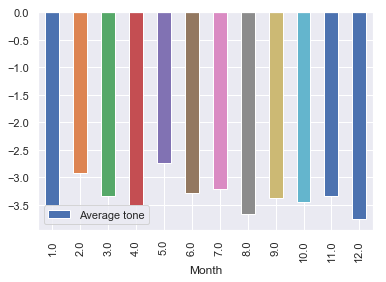

In [3]:
fr_mentions = fr_mentions.groupBy('Month').agg(mean('MentionDocTone').alias('Average tone'))

fr_mentions_Pandas_df = fr_mentions.toPandas()
fr_mentions_Pandas_df.dropna(inplace=True)
fr_mentions_Pandas_df.sort_values('Month', ascending=True, inplace=True)

fr_mentions_Pandas_df.plot.bar(x='Month', y='Average tone')

In [4]:
it_mentions = spark.read.parquet("it_mentions_casted_date.parquet")
it_mentions = it_mentions.select('MentionSourceName','MentionDocTone', 'Month')
it_mentions.show()

+--------------------+--------------+-----+
|   MentionSourceName|MentionDocTone|Month|
+--------------------+--------------+-----+
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|firenze.repubblic...|     3.7974684|    6|
|firenze.repubblic...|     3.7974684|    6|
|firenze.repubblic...|     3.7974684|    6|
|lagazzettadelmezz...|           0.0|    6|
|lagazzettadelmezz...|           0.0|    6|
|           cutuli.it|      5.188679|    6|
|           cutuli.it|      5.188679|    6|
|           cutuli.it|      5.188679|    6|
|   gazzettadelsud.it|     -6.590909| null|
|   gazzettadelsud.it|    -7.1017275| null|
|lagazzettadelmezz...|    -7.101

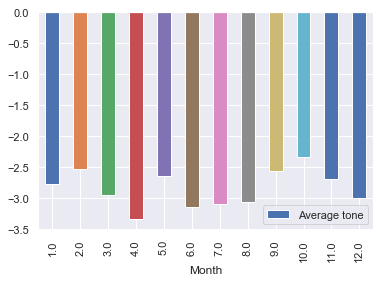

In [5]:
it_mentions = it_mentions.groupBy('Month').agg(mean('MentionDocTone').alias('Average tone'))

it_mentions_Pandas_df = it_mentions.toPandas()
it_mentions_Pandas_df.dropna(inplace=True)
it_mentions_Pandas_df.sort_values('Month', ascending=True, inplace=True)

it_mentions_Pandas_df.plot.bar(x='Month', y='Average tone')

We see that for these two specific countries, we do not have very obvious differences between year months. 
However...

AJOUTER INTERPRETATION PLUS COMPLETE

Now we will try to see if the mediatic tone changes over different seasons of the year. Because we thought there may be a correlation between climate and the way the people express the news. For example, in the summer a same event may be expressed more positive than in the winter

We first extracted the dataset "file_mentions_year_month_day.parquet" in format parquet with the useful columns. The following python script helps us to get the dataset from cluster:

MENTIONS_SCHEMA = StructType([
    StructField("GLOBALEVENTID",LongType(),True),
    StructField("EventTimeDate",LongType(),True),
    StructField("MentionTimeDate",LongType(),True),
    StructField("MentionType",LongType(),True),
    StructField("MentionSourceName",StringType(),True),
    StructField("MentionIdentifier",StringType(),True),
    StructField("SentenceID",LongType(),True),
    StructField("Actor1CharOffset",LongType(),True),
    StructField("Actor2CharOffset",LongType(),True),
    StructField("ActionCharOffset",LongType(),True),
    StructField("InRawText",LongType(),True),
    StructField("Confidence",LongType(),True),
    StructField("MentionDocLen",LongType(),True),
    StructField("MentionDocTone",FloatType(),True),
    StructField("MentionDocTranslationInfo",StringType(),True),
    StructField("Extras",StringType(),True)
    ])

DATA_DIR = "hdfs:///datasets/gdeltv2"
mentions_df = spark.read.option("sep", "\t").csv(os.path.join(DATA_DIR, "*.mentions.CSV"),schema=MENTIONS_SCHEMA)

mentions_df = mentions_df.withColumn("Year-Month-Day", to_date(concat(col("MentionTimeDate")), "yyyyMMddhhmmss"))

mentions_df = mentions_df.select('MentionDocTone', 'MentionTimeDate', 'MentionSourceName', 'Year-Month-Day', \
                                  year(mentions_df["Year-Month-Day"]).alias('Year'), \
                                  month(mentions_df["Year-Month-Day"]).alias('Month'),
                                )\
                         .withColumn("Year-Month",concat(col("Year"), lit("-"), col("Month"))) \
                         .drop('Year', 'Month')

mentions_df.write.parquet('file_mentions_year_month_day.parquet', mode='overwrite')

Once we have the data in our local drive, we can process it on jupyter notebook.

In [6]:
mentions_df = spark.read.parquet("/Users/sinangokce/Desktop/Project_ESKI/ADA_Project/Data/file_mentions_year_month_day.parquet")

In [7]:
mentions_df

DataFrame[MentionDocTone: float, MentionTimeDate: bigint, MentionSourceName: string, Year-Month-Day: date, Year-Month: string]

In [8]:
mentions_df = mentions_df.groupBy(window(mentions_df['Year-Month-Day'], \
                                                           "90 days", \
                                                           startTime = "24 days"
                                                          ) \
                                 ) \
                        .agg(mean("MentionDocTone")) \

In [9]:
mentions_df = mentions_df.withColumn("start", mentions_df.window.start.cast("string")) \
                         .withColumn("end", mentions_df.window.end.cast("string")) \
                         .sort('start', ascending = True) \
                         .select('start', 'end', 'avg(MentionDocTone)')

In [10]:
mentions_Pandas_df = mentions_df.toPandas()

In [11]:
mentions_Pandas_df["interval"] = "[" + mentions_Pandas_df["start"] + "; " +\
                                       mentions_Pandas_df["end"] + ")"
mentions_Pandas_df = mentions_Pandas_df[['start', 'end', 'interval', 'avg(MentionDocTone)']]

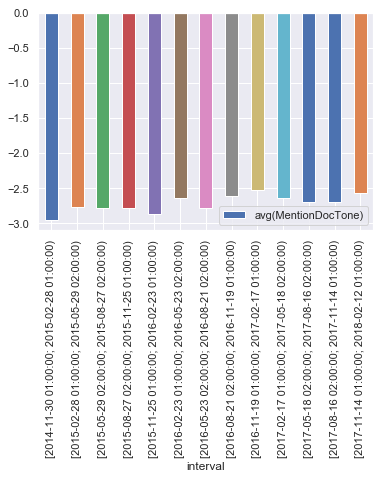

In [12]:
mentions_Pandas_df.plot.bar(x='interval', y='avg(MentionDocTone)')

This plot shows no remarkable trend of the mediatic tone over different seasons of the year since it's almost constant.

### 2. Can we find different trends in the media tone depending on the event location country ? On the source country ? Is their a link with the Happiness score of the country ?

First, let's look at mediatic tone, with respect to the event location country.
This analysis would allow us to determine whether the global news concerning a country's events are rather positive or negative. Then, we can see if there is a correlation with the actual happiness level of each country. 

### AJOUTER ICI LES RESULTATS DE SINAN (plots + correlation avec le bonheur)
#### Bien expliquer comment on a eu les data sur le bonheur et ce qu'on a fait pour lier les deux (FIPS code)

Note that some country values were missing in the Happiness World report, thus we will use inner join to get rid of countries which have no happiness score.

Now, using Google BigQuery tool, let's look at the mediatic tone related to the source country of event mentions.

The following query was run in order to get the average tone (field `MentionDocTone`) of mentions originating from the same country.
Indeed, by joining the `eventmentions` table to the `sourcesbycountry` table, we could very easily group the mentions by their source FIPS code and compute the average tone :

<img src="query_avgToneBySourceLocation.png" alt="drawing" width="500"/>

After extracting the newly created table `avgToneBySourceLocation_table`, we plotted the result.
Note that the result was splitted between positive and negative average tone in order to have smaller plots, but still be able to visualize the value for each country.

In [ ]:
avgTone = spark.read.option("sep",",").option('header', 'true').csv("avgToneBySourceLocation_table.csv")
avgTone.show()
avgTone = avgTone.withColumn('AverageTone', avgTone['AverageTone'].cast(FloatType()))
avgTone.registerTempTable('avgTone_table')

In [ ]:
avgTone_pos = avgTone.filter('AverageTone > 0')
avgTone_pos_pandas = avgTone_pos.toPandas()
avgTone_pos_pandas.sort_values('AverageTone', ascending=True, inplace=True)

sn.set(rc={'figure.figsize':(60,30)})
plot = sn.barplot(x='FIPS', y='AverageTone',data=avgTone_pos_pandas)
fig = plot.get_figure()

In [ ]:
avgTone_neg = avgTone.filter('AverageTone <= 0')
avgTone_neg_pandas = avgTone_neg.toPandas()
avgTone_neg_pandas.sort_values('AverageTone', ascending=True, inplace=True)

sn.set(rc={'figure.figsize':(60,30)})
plot = sn.barplot(x='FIPS', y='AverageTone',data=avgTone_neg_pandas)
fig = plot.get_figure()

Now, we will try to see if there is somehow a correlation between the overall Happiness of the country inhabitants.

As explained above, we join `avgToneBySourceLocation_table` with the `happiness_table` which contains the Happiness score related to each FIPS country code.

In [ ]:
happiness = spark.read.option("sep", ";").option('header', 'true').csv("HappinessCustom.csv")\
    .select('FIPS', 'Happiness_score').dropna()
    
happiness = happiness.withColumn('Happiness_score', happiness["Happiness_score"].cast(FloatType()))
print(happiness.dtypes)
happiness.show()
happiness.registerTempTable("happiness_table")

In [ ]:
query = """
select happiness_table.FIPS, Happiness_score, AverageTone
from happiness_table
inner join avgTone_table
on happiness_table.FIPS = avgTone_table.FIPS
"""

joinedTable = spark.sql(query)
joinedTable.show()

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] =10
plt.rcParams["figure.figsize"] = fig_size

joined_df = joinedTable.toPandas()
sn.regplot(x='Happiness_score', y='AverageTone', data=joined_df)

In [ ]:
pearson_coef = joined_df['Happiness_score'].corr(joined_df['AverageTone'])
print(pearson_coef)

As we can see, the result is quite surprising (or deceiving). It seems that there is only a weak correlation between Happiness score and average mediatic tone, and it is rather negative. 
This would illustrate the fact that maybe the medias are not influencing too much the inhabitants' mood and that their tone is not representative of the overall atmosphere.

### 3. Is there a link with the political schedule ?

#### US 2016 ELECTION

In [ ]:
US_electionPreceedingMentions = spark.read.option("sep",",").option('header', 'true')\
    .csv("US_electionPreceeding_mentions.csv")
US_electionPreceedingMentions.show()

## Future queries

<ul> 
   <li>Which event types are associated with negative tones ? </li>

   <li> Is there a correlation between the negativity of a news and the number of mentions ? The duration of its mediatic coverage ? </li>
</ul>

AJOUTER AUTRES